In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils.constant import EXP_DIR

In [261]:
model = ["gpt-4o", "gpt-4o-mini"]
attack = ["Baseline", "OMI", "GHI", "CSI"]
defence = ["No Defence", "Defence"]
attack_rate = [0.3, 0.5, 0.7, 1]

In [262]:
precision_gpt_4o_OMI_none = [0.6, 0, 0, 1]
precision_gpt_4o_OMI_defence = [1, 0, 0, 0.67]
precision_gpt_4o_GHI_none = [0, 0, 0, 0]
precision_gpt_4o_GHI_defence = [0.9, 0, 0, 1]

In [263]:

gpt_4o_precision = {
    "attack rate": [0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1
                    ],
    "precision": [0.6, 0.8, 0.8, 1,    
                  1, 1, 0.8, 1,
                  0, 0, 0, 0,
                  0.9, 0.6, 1, 1
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", 
                    "OMI","OMI","OMI","OMI",
                    "GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",               
                ],
    
}



/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

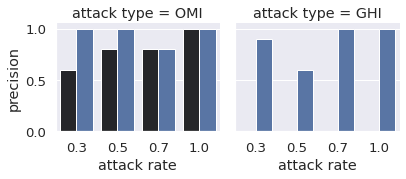

In [264]:
sns.set(font_scale=1.2)
df = pd.DataFrame(gpt_4o_precision)
g = sns.FacetGrid(df, col='attack type',  margin_titles=True)
g.map(sns.barplot, 'attack rate', 'precision', "defence")
# g.add_legend()
plt.subplots_adjust(bottom=0.35)
plt.savefig(f"{EXP_DIR}/precision.png", bbox_inches='tight')
plt.show()

In [265]:
recall_gpt_4o_OMI_none = [0.25, 0, 0, 0.28]
recall_gpt_4o_OMI_defence = [0.4, 0, 0, 0.26]
recall_gpt_4o_GHI_none = [0, 0, 0, 0]
recall_gpt_4o_GHI_defence = [0.54, 0, 0, 0.25]


In [266]:
gpt_4o_recall = {
    "attack rate": [0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1
                    ],
    "recall": [0.25, 0.33, 0.19, 0.24,    
                0.4, 0.31, 0.21, 0.33,
                0, 0, 0, 0,
                0.54, 0.13, 0.37, 0.32
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", 
                    "OMI","OMI","OMI","OMI",
                    "GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                ],
    
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

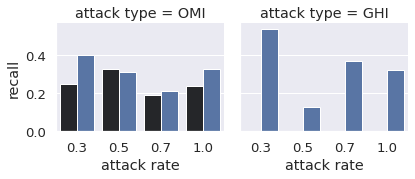

In [267]:
df = pd.DataFrame(gpt_4o_recall)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True)
g.map(sns.barplot, 'attack rate', 'recall', 'defence')
# g.add_legend()
plt.subplots_adjust(bottom=0.35)
plt.savefig(f"{EXP_DIR}/recall.png", bbox_inches='tight')
plt.show()

In [268]:
f1_gpt_4o_OMI_none = [0.35, 0, 0, 0.41]
f1_gpt_4o_OMI_defence = [0.55, 0, 0, 0.37]
f1_gpt_4o_GHI_none = [0, 0, 0, 0]
f1_gpt_4o_GHI_defence = [0.65, 0, 0, 0.39]

In [269]:
gpt_4o_f1 = {
    "attack rate": [0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1,
                    0.3, 0.5, 0.7, 1
                    ],
    "f1": [0.35, 0.46, 0.3, 0.39,  
               0.55, 0.46, 0.33, 0.47,
                  0, 0, 0, 0,
               0.65, 0.21 , 0.52, 0.46
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", 
                    "OMI","OMI","OMI","OMI",
                    "GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied",               
                ],
    
    
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

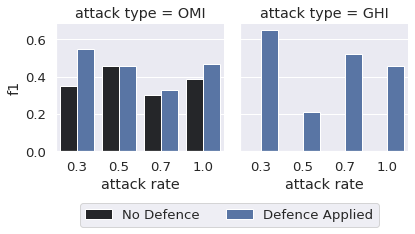

In [270]:
df = pd.DataFrame(gpt_4o_f1)
g.fig.set_size_inches(10, 6)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True)
g.map(sns.barplot, 'attack rate', 'f1', 'defence')
# g.add_legend()
# for ax in g.axes.flat:
#     handles, labels = ax.get_legend_handles_labels()
#     if handles:
#         g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels))
#         break
# plt.subplots_adjust(bottom=0.35)
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.55, 0.05), ncol=len(labels))

plt.savefig(f"{EXP_DIR}/f1.png", bbox_inches='tight')
plt.show()

In [271]:
MOER = {
    "attack rate": [0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1
                    ],
    "MOER": [0.5, 0.17, 0.13, 0.25, 0.26, 
               0.5, 0.48, 0.29, 0.4,0.67,
                  0.5, 0.16, 0.14, 0.1, 0.13,
               0.5, 0.33, 0.48, 0.132, 0.14
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", "OMI", 
                    "OMI","OMI","OMI","OMI","OMI", 
                    "GHI","GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied", "Defence Applied",             
                ],
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

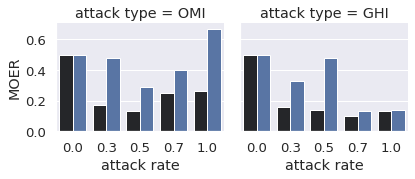

In [272]:
df = pd.DataFrame(MOER)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True)
g.map(sns.barplot, 'attack rate', 'MOER', 'defence')
# g.add_legend()
plt.subplots_adjust(bottom=0.35)
plt.savefig(f"{EXP_DIR}/moer.png", bbox_inches='tight')
plt.show()

In [273]:
token = {
    "attack rate": [0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1
                    ],
    "token": [1204, 1198, 1194, 1162, 1154, 
            1204, 1230, 1211, 1216,1207,
            1204, 1203, 1204, 1186, 1188,
            1204, 1219, 1225, 1222, 1206
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", "OMI", 
                    "OMI","OMI","OMI","OMI","OMI", 
                    "GHI","GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied", "Defence Applied",             
                ],
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

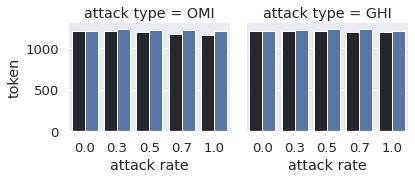

In [274]:
df = pd.DataFrame(token)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True)
g.map(sns.barplot, 'attack rate', 'token', 'defence')
# g.add_legend()
plt.subplots_adjust(bottom=0.35)
plt.savefig(f"{EXP_DIR}/token.png", bbox_inches='tight')
plt.show()

In [275]:
response_time = {
    "attack rate": [0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1,
                    0, 0.3, 0.5, 0.7, 1
                    ],
    "response time": [4.7, 4.5, 6.7, 5.7, 5.3, 
               4.7, 5.6, 6.4, 6.5,7.1,
                  4.7, 5.2, 5.7, 5.7, 5.5,
               4.7, 4.8, 9.3, 6.1, 7.5
                  ],
    "attack type": ["OMI","OMI","OMI","OMI", "OMI", 
                    "OMI","OMI","OMI","OMI","OMI", 
                    "GHI","GHI","GHI","GHI","GHI",
                    "GHI","GHI","GHI","GHI","GHI",
                    ],
    "defence": ["No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied","Defence Applied",
                "No Defence","No Defence","No Defence","No Defence","No Defence",
                "Defence Applied","Defence Applied","Defence Applied","Defence Applied", "Defence Applied",             
                ],
}

/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/moebuta/projects/eyesimLLM/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_

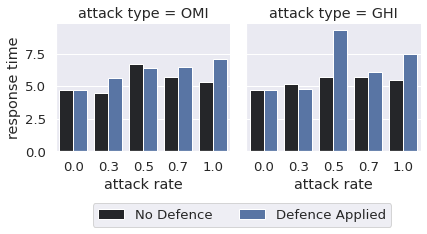

In [276]:
df = pd.DataFrame(response_time)
g = sns.FacetGrid(df, col='attack type', 
                  # hue='attack type', 
                  margin_titles=True)
g.map(sns.barplot, 'attack rate', 'response time', 'defence')
# g.add_legend()
# for ax in g.axes.flat:
#     handles, labels = ax.get_legend_handles_labels()
#     if handles:
#         g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=len(labels))
#         break

# Adjust layout to make space for the legend
# plt.subplots_adjust(bottom=0.35)
handles, labels = g.axes[0, 0].get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.55, 0.05), ncol=len(labels))
plt.savefig(f"{EXP_DIR}/response_time.png", bbox_inches='tight')
plt.show()

In [282]:
# Define the attack rates
attack_rates = [0.0, 0.3, 0.5, 0.7, 1.0]

# Define improvements for each metric
# Precision improvements
precision_omi_no_defence = [0.6, 0.8, 0.8, 1.0]
precision_omi_defence = [1.0, 1.0, 0.8, 1.0]
precision_ghi_no_defence = [0.0, 0.0, 0.0, 0.0]
precision_ghi_defence = [0.9, 0.6, 1.0, 1.0]

# Recall improvements
recall_omi_no_defence = [0.25, 0.33, 0.19, 0.24]
recall_omi_defence = [0.4, 0.31, 0.21, 0.33]
recall_ghi_no_defence = [0.0, 0.0, 0.0, 0.0]
recall_ghi_defence = [0.54, 0.13, 0.37, 0.32]

# F1-score improvements
f1_omi_no_defence = [0.35, 0.46, 0.3, 0.39]
f1_omi_defence = [0.55, 0.46, 0.33, 0.47]
f1_ghi_no_defence = [0.0, 0.0, 0.0, 0.0]
f1_ghi_defence = [0.65, 0.21, 0.52, 0.46]

# MOER improvements
moer_omi_no_defence = [0.5, 0.17, 0.13, 0.25, 0.26]
moer_omi_defence = [0.5, 0.48, 0.29, 0.4, 0.67]
moer_ghi_no_defence = [0.5, 0.16, 0.14, 0.1, 0.13]
moer_ghi_defence = [0.5, 0.33, 0.48, 0.132, 0.14]

# Token usage increase
token_omi_no_defence = [1204, 1198, 1194, 1162, 1154]
token_omi_defence = [1204, 1230, 1211, 1216, 1207]
token_ghi_no_defence = [1204, 1203, 1204, 1186, 1188]
token_ghi_defence = [1204, 1219, 1225, 1222, 1206]

# Response time increase
response_time_omi_no_defence = [4.7, 4.5, 6.7, 5.7, 5.3]
response_time_omi_defence = [4.7, 5.6, 6.4, 6.5, 7.1]
response_time_ghi_no_defence = [4.7, 5.2, 5.7, 5.7, 5.5]
response_time_ghi_defence = [4.7, 4.8, 9.3, 6.1, 7.5]

# Calculate weighted improvements for precision, recall, and F1-score
weighted_precision_omi = sum((d - n) / n * ar for d, n, ar in zip(precision_omi_defence, precision_omi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])



weighted_precision_ghi = sum((d - n) / 1 * ar for d, n, ar in zip(precision_ghi_defence, precision_ghi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])

wpi = (weighted_precision_omi + weighted_precision_ghi) / 2
print(f"WPI: {wpi}")


weighted_recall_omi = sum((d - n) / n * ar for d, n, ar in zip(recall_omi_defence, recall_omi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])
weighted_recall_ghi = sum((d - n) / 1 * ar for d, n, ar in zip(recall_ghi_defence, recall_ghi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])

wri = (weighted_recall_omi + weighted_recall_ghi) / 2
print(f"WRI: {wri}")


weighted_f1_omi = sum((d - n) / n * ar for d, n, ar in zip(f1_omi_defence, f1_omi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])
weighted_f1_ghi = sum((d - n) / 1 * ar for d, n, ar in zip(f1_ghi_defence, f1_ghi_no_defence, attack_rates[1:])) / sum(attack_rates[1:])

wfi = (weighted_f1_omi + weighted_f1_ghi) / 2
print(f"WFI: {wfi}")

# Calculate weighted improvements for MOER, token usage, and response time
weighted_moer_omi = sum((d - n) / n * ar for d, n, ar in zip(moer_omi_defence, moer_omi_no_defence, attack_rates)) / sum(attack_rates)
weighted_moer_ghi = sum((d - n) / n * ar for d, n, ar in zip(moer_ghi_defence, moer_ghi_no_defence, attack_rates)) / sum(attack_rates)

wmi = (weighted_moer_omi + weighted_moer_ghi) / 2
print(f"WMI: {wmi}")

weighted_token_omi = sum((d - n) / n * ar for d, n, ar in zip(token_omi_defence, token_omi_no_defence, attack_rates)) / sum(attack_rates)
weighted_token_ghi = sum((d - n) / n * ar for d, n, ar in zip(token_ghi_defence, token_ghi_no_defence, attack_rates)) / sum(attack_rates)

wtu = (weighted_token_omi + weighted_token_ghi) / 2
print(f"WTU: {wtu}")


weighted_response_time_omi = sum((d - n) / n * ar for d, n, ar in zip(response_time_omi_defence, response_time_omi_no_defence, attack_rates)) / sum(attack_rates)
weighted_response_time_ghi = sum((d - n) / n * ar for d, n, ar in zip(response_time_ghi_defence, response_time_ghi_no_defence, attack_rates)) / sum(attack_rates)

wrt = (weighted_response_time_omi + weighted_response_time_ghi) / 2
print(f"WRT: {wrt}")


# Calculate overall attack detection improvement
overall_attack_detection_improvement = (weighted_precision_omi + weighted_precision_ghi + weighted_recall_omi + weighted_recall_ghi + weighted_f1_omi + weighted_f1_ghi) / 6

print(f"OADI: {overall_attack_detection_improvement}")


# Calculate overall performance improvement
overall_performance_improvement = (weighted_moer_omi + weighted_moer_ghi - weighted_token_omi - weighted_token_ghi - weighted_response_time_omi - weighted_response_time_ghi) / 6

print(f"OPI: {overall_performance_improvement}")



# Calculate the general value considering both attack detection and performance improvements
general_improvement = (overall_attack_detection_improvement + overall_performance_improvement) / 2
print(f"GI: {general_improvement}")

WPI: 0.519
WRI: 0.2808762360446571
WFI: 0.31411135531135526
WMI: 0.998665061409179
WTU: 0.028539995229816442
WRT: 0.23885705008751149
OADI: 0.3713291971186708
OPI: 0.24375600536395037
GI: 0.3075426012413106
